# Homework 4 (100 Points)

## Exercise 1 (40pts)

In this exercise we will implement a Natural Language Processing (NLP) system using binary logistic regression.

The data you will be working with comes from the [Yelp Dataset](https://www.yelp.com/dataset). Each line is a review that consists of a label (0 for negative reviews and 1 for positive reviews) and a set of words.

```
1 i will never forget this single breakfast experience in mad...
0 the search for decent chinese takeout in madison continues ...
0 sorry but me julio fell way below the standard even for med...
1 so this is the kind of food that will kill you so there s t...
```

In order to transform the set of words into vectors, we will rely on a method of feature engineering called word embeddings. Rather than simply indicating which words are present, word embeddings represent each word by "embedding" it in a low-dimensional vector space which may carry more information about the semantic meaning of the word. (for example in this space, the words "King" and "Queen" would be close).

`word2vec.txt` contains the `word2vec` embeddings for about 15 thousand words. Not every word in each review is present in the provided `word2vec.txt` file. We can treat these words as being "out of vocabulary" and ignore them.

### Example

Let x_i denote the sentence `“a hot dog is not a sandwich because it is not square”` and let a toy word2vec dictionary be as follows:

```
hot      0.1     0.2     0.3
not      -0.1    0.2     -0.3
sandwich 0.0     -0.2    0.4
square   0.2     -0.1    0.5
```

we would first `trim` the sentence to only contain words in our vocabulary: `"hot not sandwich not square”` then embed x_i into the feature space:

$$ φ2(x_i)) = \frac{1}{5} (word2vec(\text{hot}) + 2 · word2vec(\text{not}) + word2vec(\text{sandwich}) + word2vec(\text{square})) = \left[0.02 \hspace{2mm} 0.06 \hspace{2mm} 0.12 \hspace{2mm}\right]^T $$

### Part 1 (20pts)

a) Implement a function to trim out-of-vocabulary words from the reviews. Your function should return an nd array of the same dimension and dtype as the original loaded dataset. (10pts)

In [129]:
import csv
import numpy as np

VECTOR_LEN = 300   # Length of word2vec vector
MAX_WORD_LEN = 64  # Max word length in dict.txt and word2vec.txt

################################################################################
# We have provided you the functions for loading the tsv and txt files. Feel   #
# free to use them! No need to change them at all.                             #
################################################################################


def load_tsv_dataset(file):
    """
    Loads raw data and returns a tuple containing the reviews and their ratings.

    Parameters:
        file (str): File path to the dataset tsv file.

    Returns:
        An np.ndarray of shape N. N is the number of data points in the tsv file.
        Each element dataset[i] is a tuple (label, review), where the label is
        an integer (0 or 1) and the review is a string.
    """
    dataset = np.loadtxt(file, delimiter='\t', comments=None, encoding='utf-8',
                         dtype='l,O')
    return dataset


def load_feature_dictionary(file):
    """
    Creates a map of words to vectors using the file that has the word2vec
    embeddings.

    Parameters:
        file (str): File path to the word2vec embedding file.

    Returns:
        A dictionary indexed by words, returning the corresponding word2vec
        embedding np.ndarray.
    """
    word2vec_map = dict()
    with open(file) as f:
        read_file = csv.reader(f, delimiter='\t')
        for row in read_file:
            word, embedding = row[0], row[1:]
            word2vec_map[word] = np.array(embedding, dtype=float)
    return word2vec_map


def trim_reviews(path_to_dataset):
    reviews = []
    # change to path_to_dataset
    reviews = load_tsv_dataset(path_to_dataset)
    vocab = {}
    vocab = load_feature_dictionary("data/word2vec.txt")
    custom_dtype = np.dtype([('f0', 'int64'), ('f1', 'O')])
    new_reviews = np.empty(len(reviews), dtype=custom_dtype)
    for i in range(len(reviews)):
        # break the review text into word tokens
        tokens = []
        filtered_tokens = ""
        tokens = reviews[i][1].lower().split()
        for t in tokens:
            if t in vocab:
                filtered_tokens += " " + t
        for t in tokens:
            if t in vocab:
                # print(t)
                new_reviews[i] = (reviews[i][0], filtered_tokens)
    return new_reviews
    

trim_train = trim_reviews("./data/train_small.tsv")
trim_test = trim_reviews("./data/test_small.tsv")


In [ ]:
reviews
reviews[0][1]
vocab["films"].shape
len(reviews)

In [ ]:
vocab["films"]

In [130]:
reviews = []
reviews = load_tsv_dataset("data/train_small.tsv")
vocab = {}
vocab = load_feature_dictionary("data/word2vec.txt")
custom_dtype = np.dtype([('f0', 'int64'), ('f1', 'O')])
new_reviews = np.empty(len(reviews), dtype=custom_dtype)
new_reviews


array([(0, None), (0, None), (0, None), (0, None), (0, None), (0, None),
       (0, None), (0, None), (0, None), (0, None), (0, None), (0, None),
       (0, None), (0, None), (0, None), (0, None), (0, None), (0, None),
       (0, None), (0, None)], dtype=[('f0', '<i8'), ('f1', 'O')])

In [131]:
for i in range(len(reviews)):
    # break the review text into word tokens
    tokens = []
    filtered_tokens = ""
    tokens = reviews[i][1].lower().split()
    for t in tokens:
        if t in vocab:
            filtered_tokens += " " + t
    for t in tokens:
        if t in vocab:
            # print(t)
            new_reviews[i] = (reviews[i][0], filtered_tokens)

new_reviews
    

array([(1, ' i will never forget this single breakfast experience in madison it was awesome yes it is crowded and you have to sit with other groups at the large tables yes you have to pay cash yes it seems like you are eating breakfast in your grandmother s kitchen but seriously i like my grandmother s kitchen it is quite the experience and totally worth the perceived the coffee was fresh and dark the chocolate was to die for and the fruit covered french toast made from was sinful if i ever find myself in madison again i will definitely go out of my way to return to this little gem of a breakfast'),
       (0, ' the search for decent chinese in madison continues the food at this place we ordered delivery is nothing worth waiting hours for egg rolls which contain nothing but lo they clearly do not understand how to work with nor do they get how to deliver quality food in a timely fashion the one plus was the were still just save your time and money and don t bother not even a good of ca

In [ ]:
vocab.values()

In [132]:
embedded_reviews = []
for i in range(len(new_reviews)):
    # break the trimmed review text into word tokens
    tokens = []
    tokens = new_reviews[i][1].lower().split()
    # how many word tokens in one trimmed review
    token_count = len(tokens)
    # retrieve the first embedding value from vocab and create a np array with same shape of that value
    embedded_review = np.zeros_like(next(iter(vocab.values())))
    for t in tokens:
        embedded_review += vocab[t]
    embedded_review = np.round(embedded_review / token_count, 6)
    embedded_review = np.insert(embedded_review, 0, new_reviews[i][0])
    embedded_reviews.append(embedded_review)

embedded_reviews



[array([ 1.000000e+00, -1.666460e-01,  6.410270e-01, -6.480500e-02,
         1.799030e-01,  7.589470e-01, -9.670970e-01, -1.191150e+00,
        -2.290800e-01,  4.177960e-01,  1.160800e-01, -5.542920e-01,
         4.633890e-01, -6.910800e-01,  8.209560e-01, -3.174690e-01,
         2.935130e-01, -1.194779e+00, -5.073630e-01, -4.456810e-01,
         1.536699e+00, -1.402850e+00,  1.293186e+00,  2.060800e-01,
         6.461330e-01,  5.210620e-01,  1.715947e+00, -1.319637e+00,
         2.266810e-01, -2.656990e-01, -4.277170e-01, -7.030180e-01,
        -1.091717e+00, -7.339200e-01, -8.855580e-01,  1.500018e+00,
         1.646407e+00,  1.724717e+00, -1.069558e+00,  1.222920e+00,
        -1.805779e+00, -8.648940e-01, -6.770000e-03,  9.336000e-03,
        -1.124832e+00, -2.408035e+00, -1.149929e+00, -6.696500e-02,
         1.165142e+00, -1.547903e+00,  1.291770e-01,  9.913720e-01,
        -1.109221e+00, -1.577790e-01,  1.973991e+00,  2.040442e+00,
         1.737779e+00, -9.253980e-01, -1.792354e

b) Implement the embedding and store it to a `.tsv` file where the first column is the label and the rest are the features from the embedding. Round all numbers to 6 decimal places. `embedded_train_small.tsv` and `embedded_test_small.tsv` contain the expected output of your function. (10pts)

In [133]:
def embed_reviews(trimmed_dataset):
    embedded_reviews = []
    for i in range(len(trimmed_dataset)):
        # break the trimmed review text into word tokens
        tokens = []
        tokens = trimmed_dataset[i][1].lower().split()
        # how many word tokens in one trimmed review
        token_count = len(tokens)
        # retrieve the first embedding value from vocab and create a np array with same shape of that value
        embedded_review = np.zeros_like(next(iter(vocab.values())))
        for t in tokens:
            embedded_review += vocab[t]
        embedded_review = np.round(embedded_review / token_count, 6)
        embedded_review = np.insert(embedded_review, 0, trimmed_dataset[i][0])
        embedded_reviews.append(embedded_review)
    return embedded_reviews


def save_as_tsv(dataset, filename):
    with open(filename, 'w+') as f:
        writer = csv.writer(f, delimiter='\t')
        for row in dataset:
            writer.writerow(row)
    return filename

embedded_train = embed_reviews(trim_train)
embedded_test = embed_reviews(trim_test)

save_as_tsv(embedded_train, "./data/output/embedded_train_small.tsv")
save_as_tsv(embedded_test, "./data/output/embedded_test_small.tsv")


'./data/output/embedded_test_small.tsv'

### Part 2 (20pts)

In this part we'll be implementing Gradient Descent for binary Logistic Regression Classifier.

Some rules:

1. Include an intercept term in your model. You must consider the bias term as part of the weight vector and not a separate term to keep track of.
2. Initialize all model parameters to 0
3. Use vector and matrix multiplication

The expected `metrics.txt` from the dataset with `500` epochs and `0.001` learning rate is:

```
error(train): 0.000000
error(test): 0.625000
```

We will be testing your code on other, larger datasets.

In [28]:
import numpy as np

def load_tsv_dataset(file):
    return np.loadtxt(file, delimiter='\t', encoding='utf-8')


def sigmoid(x):
    e = np.exp(x)
    return e / (1 + e)


def gd(theta, X, y, learning_rate):
    # TODO: implement in vector form
    y_pred = predict(theta, X)
    # normalize the gradient by data size
    grad = np.dot(X.T, (y_pred - y)) / len(y)
    # grad = (y_pred - y).dot(X) / len(y)
    theta = theta - learning_rate * grad
    
    return theta


def train(theta, X, y, num_epoch, learning_rate):
    for epoch in range(num_epoch):
        theta = gd(theta, X, y, learning_rate)
    return theta


def predict(theta, X):
    # TODO: implement in vector form
    z = np.dot(X, theta)
    y_pred = sigmoid(z)
    return y_pred


def compute_error(y_pred, y):
    # TODO: implement in vector form
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


def write_metrics(train_err, test_err, metrics_out):
    with open(metrics_out, 'w+') as f:
        w = "error(train): " + "{:.6f}".format(train_err) + "\n"
        w += "error(test): " + "{:.6f}".format(test_err) + "\n"
        f.write(w)
    return


def logistic_reg(formatted_train, formatted_test, metrics_out, num_epochs, learning_rate):

    train_data = load_tsv_dataset(formatted_test)
    test_data = load_tsv_dataset(formatted_train)
    
    X_train = train_data[:, 1:]
    y_train = train_data[:, 0]
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

    X_test = test_data[:, 1:]
    y_test = test_data[:, 0]
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test)) 
    
    theta = np.zeros(X_train.shape[1])

    learned_theta = train(theta, X_train, y_train, num_epochs, learning_rate)
    train_pred = predict(learned_theta, X_train)
    train_err = compute_error(train_pred, y_train)

    test_pred = predict(learned_theta, X_test)
    test_err = compute_error(test_pred, y_test)

    write_metrics(train_err, test_err, metrics_out)
    return 


logistic_reg("./data/output/embedded_train_small.tsv", "./data/output/embedded_test_small.tsv", "./data/output/metrics.txt", 500, 0.001)


## Exercise 2 (60 Points)

For this exercise, recall the lab's kaggle competition where you predicted if a cookie was defective or not (assuming you attend labs). For more information on the data and details, [click here to view the competition and data details](https://www.kaggle.com/competitions/cs506-lab-defective-cookie-detection/data)

However, what we will do differently here is check if two of the features were correlated. This is important because if two features are correlated, then we can remove one of the features and still get the same information. This is part of the feature selection process.

### Loading in the Data

For this exercise, we are interested in the two features `Texture Hardness` and `Texture Chewiness` and want to see if they are related. To do this, we will load in the data and create a scatter plot of the two features.

**a)** (1 Point) Download the kaggle data from the link above and read in the `csv` files `cookie_train.csv` and `cookie_test.csv`

In [31]:
#Code in this cell
import csv
import pandas as pd
cookie_train = pd.read_csv("data/cookie_train.csv")
cookie_test = pd.read_csv("data/cookie_test.csv")


In [34]:
cookie_train

,Id,Texture Hardness,Texture Chewiness,Texture Crispiness,Color L*,Color a*,Color b*,Taste Sweetness,Taste Saltiness,Taste Bitterness,Shape Diameter,Shape Thickness,Smell Intensity,Smell Complexity,Smell Specific Compound,Detected Chemical,Defective
0,59,120,0.05,1.2,80,20,40,2.0,0.5,0.10,6.0,0.5,1.0,10,5,Ethyl butyrate,0
1,60,150,0.08,1.4,85,23,43,3.0,0.6,0.20,5.5,0.6,0.9,12,6,Limonene,1
2,61,135,0.06,1.3,82,22,42,2.5,0.3,0.30,6.2,0.4,0.8,8,4,?-Pinene,0
3,62,100,0.02,1.0,75,18,38,1.5,0.2,0.05,7.0,0.7,0.7,7,3,Linalool,1
4,63,145,0.07,1.5,87,25,45,3.5,0.8,0.15,5.8,0.5,0.9,13,7,?-Caryophyllene,1
5,64,130,0.04,1.1,81,21,41,2.0,0.4,0.10,6.1,0.6,0.8,9,5,3-Carene,1
6,65,110,0.03,1.2,78,19,39,2.0,0.2,0.05,6.5,0.7,0.6,8,4,1-Octen-3-ol,0
7,66,105,0.01,0.9,73,16,36,1.0,0.1,0.02,7.2,0.8,0.4,6,3,Geraniol,0
8,67,115,0.02,1.0,76,18,38,1.8,0.3,0.03,6.5,0.6,0.5,7,4,2-Nonanone,0
9,68,128,0.06,1.1,82,20,40,2.0,0.4,0.05,6.0,0.5,1.0,8,5,Limonene,0


### Combining Training and Testing Data

The lab did not have a lot of cookies for the training set, so what we will do is combine the training and testing data together without any loss of generality.

**b)** (3 Point) Combine the training and testing data together into a single dataframe called `cookie_data` and plot the scatter plot for `Texture Chewiness` (our y or our response variable) and `Texture Hardness` (our x or our explanatory variable). Make sure to label your axes and give your plot a title.

In [33]:
#Code in this cell
cookie_data = pd.concat([cookie_train, cookie_test], ignore_index = True)
cookie_data


,Id,Texture Hardness,Texture Chewiness,Texture Crispiness,Color L*,Color a*,Color b*,Taste Sweetness,Taste Saltiness,Taste Bitterness,Shape Diameter,Shape Thickness,Smell Intensity,Smell Complexity,Smell Specific Compound,Detected Chemical,Defective
0,59,120,0.05,1.2,80,20,40,2.0,0.5,0.10,6.0,0.5,1.0,10,5,Ethyl butyrate,0.0
1,60,150,0.08,1.4,85,23,43,3.0,0.6,0.20,5.5,0.6,0.9,12,6,Limonene,1.0
2,61,135,0.06,1.3,82,22,42,2.5,0.3,0.30,6.2,0.4,0.8,8,4,?-Pinene,0.0
3,62,100,0.02,1.0,75,18,38,1.5,0.2,0.05,7.0,0.7,0.7,7,3,Linalool,1.0
4,63,145,0.07,1.5,87,25,45,3.5,0.8,0.15,5.8,0.5,0.9,13,7,?-Caryophyllene,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,17,130,0.06,1.3,81,23,43,2.8,0.5,0.03,5.9,0.5,0.6,11,6,Geraniol,NaN
84,18,115,0.03,0.9,74,17,36,1.6,0.3,0.01,6.6,0.8,0.6,8,5,Citral,NaN
85,19,145,0.09,1.9,90,30,50,4.2,0.8,0.20,5.2,0.4,1.0,12,7,Isoamyl acetate,NaN
86,20,128,0.05,1.1,80,22,42,2.1,0.4,0.01,6.1,0.6,0.9,9,6,Pulegone,NaN


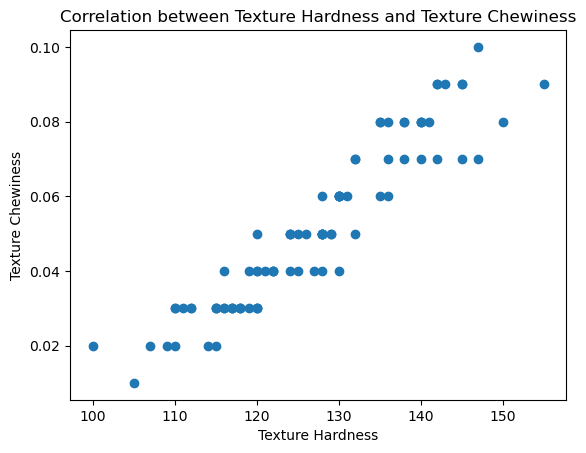

In [120]:
import matplotlib.pyplot as plt

plt.scatter(cookie_data["Texture Hardness"], cookie_data["Texture Chewiness"])
plt.xlabel('Texture Hardness')
plt.ylabel('Texture Chewiness')
plt.title('Correlation between Texture Hardness and Texture Chewiness')
plt.show()


### Checking If We Can Do Linear Regression

It is important to check all requirements/assumptions for linear regression are met before we do linear regression. One of the requirements is that the explanatory variable and response variable are linearly related, which we checked by noticing the scatter plot was linear. However, there is much more to check!

#### Checking for Normality
It is important to check that the response variable is normally distributed. This is important for hypothesis testing and relates to the idea of linear regression being an unbiased, minimum variance estimator (if you're interested in this, check out the course CAS MA 582).


**c) (5 Points)** Plot an appropriate graph to determine if the response variable `Texture Chewiness` follows the normality assumption. State whether the normality assumption is met or not. If it is not met, state what can we do to fix this.

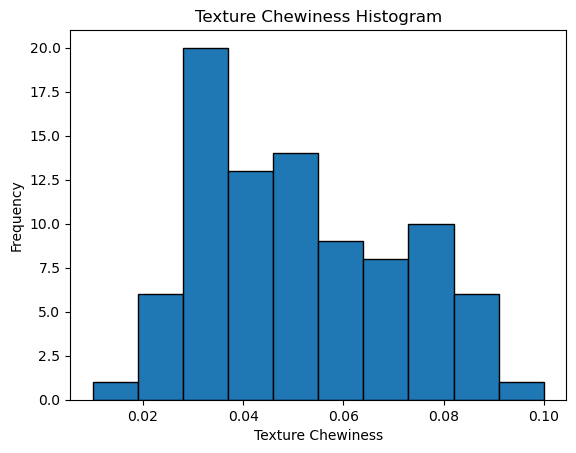

In [51]:
#Plot in this cell
plt.hist(cookie_data["Texture Chewiness"], edgecolor = 'black')
plt.xlabel('Texture Chewiness')
plt.ylabel('Frequency')
plt.title('Texture Chewiness Histogram')
plt.show()


_(Written response goes in this cell)_

Based on the histogram visualization, the normality assumption is met. 


#### Checking for Homoscedasticity
It is important to check that the variance of the response variable is the same across all values of the explanatory variable. Otherwise, the confidence around a predicted value of the response variable will vary depending on the explanatory variable value.

**d) (5 Points)** Plot an appropriate graph to determine if the response variable `Texture Chewiness` follows the homoscedasticity assumption. State whether the homoscedasticity assumption is met or not. If it is not met, state what can we do to fix this.

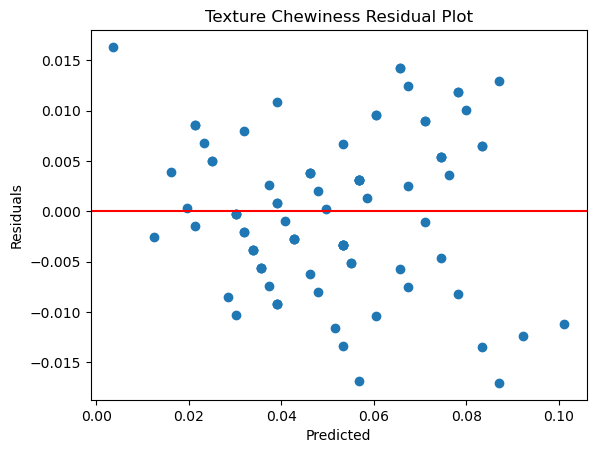

In [52]:
#Plot in this cell

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = cookie_data['Texture Hardness'].values.reshape(-1, 1)
y = cookie_data['Texture Chewiness']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Texture Chewiness Residual Plot")
plt.show()



_(Written response goes in this cell)_

The homoscedasticity assumption is met. The points are randomly scattered around the horizontal axis with no discernible pattern. 

#### Checking for Independence
It is important to check that the explanatory variable and response variable are independent. Otherwise, the model isn't really best fit with a line. To do so, we will use the Durbin-Watson test.

**e) (5 Points)** Use the Durbin-Watson test to determine if the explanatory variable and response variable are independent. State whether if the independence assumption is met or not. If it is not met, state what can we do to fix this. You may use any library to do this, and for more information, check out [this link](https://www.investopedia.com/terms/d/durbin-watson-statistic.asp).

In [55]:
#Code in this cell
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print("durbin_watson: ", dw)
if dw >= 1.5 and dw <= 2.5:
    print("The independence is met.")
else:
    print("The independence is not met.")


durbin_watson:  2.2797136857816565
The independence is met.


_(Written response goes in this cell)_

The independence assumption is met since durbin watson value is within 1.5-2.5 range. 

#### Adjusting the Model
If you think any of the assumptions are not met, then you should respectively fix the model.

**f) (6 Points)** If you think atleast one of the assumptions were not met, then adjust the model how you described you would. Otherwise, proceed to the next step and in the cell below, write "No adjustments were made to the model". However, if you do adjust the model, then in the cell below, justify why your adjustments is appropriate (i.e. plot the new graphs and statistics found above). You may add as many cells as you like.

In [117]:
#Code in this cell

No adjustments were made to the model. 

### Hypothesis Testing
Now that we have a model that is appropriate, we can do hypothesis testing. We will be using the Linear Regression t-test to test if the explanatory variable is a significant predictor of the response variable.

**g) (5 Points)** Use the Linear Regression t-test to determine if the explanatory variable `Texture Hardness` is a significant predictor of the response variable `Texture Chewiness`. State whether if the explanatory variable is a significant predictor of the response variable or not using an alpha significance level of $\alpha = 0.05$, the null hypothesis $\beta_{hardness} = 0$ and alternative hypothesis $\beta_{hardness} \neq 0$. If it is not, state what can we do to fix this. You may use any library to do this.

In [118]:
#Your code in this cell
import statsmodels.api as sm

# Add a constant term to the Texture Hardness variable
X = sm.add_constant(cookie_data['Texture Hardness'])

# Fit the linear regression model
model = sm.OLS(cookie_data['Texture Chewiness'], X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Texture Chewiness   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     625.0
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           3.27e-41
Time:                        14:14:19   Log-Likelihood:                 305.19
No. Observations:                  88   AIC:                            -606.4
Df Residuals:                      86   BIC:                            -601.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1736      0.009  

_(Written response goes in this cell)_

The explantory variable (Hardness) is a significant predictor of the reponse variable (Chewiness) because its p value is 0, and is smaller than the alpha significance level of 0.05. So we reject the null hypothesis 𝛽ℎ𝑎𝑟𝑑𝑛𝑒𝑠𝑠=0. 

### Adding a New Feature
Now that we have determined that the explanatory variable is a significant predictor of the response variable, you noticed the fit isn't 100% perfect still (e.g. your model is not capturing all the variation in the data). You think that there is another feature that can help improve the model. You think that the feature `Taste Sweetness` can help improve your model. You want to test if this is true. You may assume that all the assumptions are met for this new model to conduct linear regression.

**h) (10 Points)** Now that you have two features to predict your response variable, you will have to use multiple linear regression. Use the `statsmodels` library to do multiple linear regression. Then, determine if the explanatory variables `Texture Hardness` and `Taste Sweetness` are significant predictors of the response variable `Texture Chewiness` using an alpha significance level of $\alpha = 0.001$, the null hypothesis $\beta_{hardness} = 0$ and $\beta_{sweetness} = 0$ and alternative hypothesis $\beta_{hardness} \neq 0$ and $\beta_{sweetness} \neq 0$. If it is not, state what can we do to fix this. You may use any library to do this.

Moreover, justify whether the overall model is significant or not using the F-test with the same $\alpha$ given above. If it is not, state what can we do to fix this.

_You may use the transformed model made (if one was made) from the previous parts and add this new feature to it._

In [119]:
#Your code in this cell
import statsmodels.api as sm

# Define the independent variables (Texture Hardness and Taste Sweetness) and the dependent variable (Texture Chewiness)
X = cookie_data[['Texture Hardness', 'Taste Sweetness']]
y = cookie_data['Texture Chewiness']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:      Texture Chewiness   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     560.2
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.13e-49
Time:                        14:25:49   Log-Likelihood:                 328.93
No. Observations:                  88   AIC:                            -651.9
Df Residuals:                      85   BIC:                            -644.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1096      0.011  

_(Written response goes in this cell)_

The explantory variables (Hardness and sweetness)  are significant predictors of the reponse variable (Chewiness) because their p values are 0, and are smaller than the alpha significance level of 0.001. So we reject the null hypothesis 𝛽ℎ𝑎𝑟𝑑𝑛𝑒𝑠𝑠=0 and 𝛽𝑠𝑤𝑒𝑒𝑡𝑛𝑒𝑠𝑠=0. 

The p value associated with F-statistic is 1.13e-49. Since this p-value is much smaller than the significance level (α = 0.001), I can reject the null hypothesis and conclude that the overall model is significant.


### Interpretation
It is important to be able to interpret the results of the model. This is important because it allows us to understand the model and how it works. It also allows us to understand the relationship between the predictors and the response variable, and this applies to not just linear regression, but all learning models.

**i) (10 Points)** Interpret the coefficients of the model made in part **h**. What do they mean? What do they represent? What do they tell us about the relationship between the predictors and the response variable? If your code output in part h does not provide these results, you are welcome to use any library here to do so.

In [ ]:
#Your code in this cell if you need it

_(Written response goes in this cell)_

Coefficients and their significance: The coefficients for Texture Hardness and Taste Sweetness are 0.0011 and 0.0107, respectively, and both have p-values less than α = 0.001. This indicates that both explanatory variables are significant predictors of Texture Chewiness.

F-statistic and Prob (F-statistic): explained in previous question. 

R-squared: The R-squared value is 0.929, which means that about 92.9% of the variance in the Texture Chewiness can be explained by the model containing Texture Hardness and Taste Sweetness. This indicates a strong relationship between the response variable and the explanatory variables. The model is a good fit.

Adj. R-squared: The adjusted R-squared value is 0.928, which takes into account the number of explanatory variables and the sample size. It is very close to the R-squared value, showing that adding more variables to the model does not reduce the model's performance.

Durbin-Watson: The Durbin-Watson statistic is 1.954, which is close to the desired value of 2. This suggests that there is no significant autocorrelation in the residuals.

Omnibus and Prob(Omnibus): The Omnibus test statistic is 2.068, and its corresponding p-value is 0.356. This indicates that the residuals are likely normally distributed.

Jarque-Bera (JB) and Prob(JB): The Jarque-Bera test statistic is 1.434, and its corresponding p-value is 0.488. This also supports the conclusion that the residuals are likely normally distributed.

Condition Number: The condition number is 2.2e+03, which is quite large. This may indicate the presence of multicollinearity or other numerical problems in the data.

Log-Likelihood: The log of the likelihood function for the model, 328.93. It can be used to compare the fit of different models, with higher values indicating a better fit.

AIC (-651.9) and BIC (-644.4): Model selection criteria that balance model complexity and goodness of fit. Lower values indicate a better model.

Df Residuals: The degrees of freedom of the residuals, calculated as the number of observations minus the number of parameters. It's 85 for this model. 

Df Model: The number of explanatory variables in the model. Here, it's 2. 

Covariance Type: The type of covariance matrix used for the model, which is nonrobust.


### Using Taste Bitterness over Taste Sweetness
You think that the feature `Taste Bitterness` can help improve your model since `Taste Sweetness` wasn't it.

For this section, you will continue to use your fixed/adjusted features for `Texture Hardness` and `Texture Chewiness`.

**j) (10 Points)** Plot 2 scatter plots: `Taste Bitterness` vs your possibly adjusted `Texture Chewiness` and `Taste Bitterness` vs your possibly adjusted `Texture Hardness`. Given these plots, propose an appropriate model. Justify your answer by fitting it and seeing its accuracy (you can use any metric to prove so), showing appropriate models/graphs, and ensuring assumptions are satisfied (if any). You may use any library to do this.

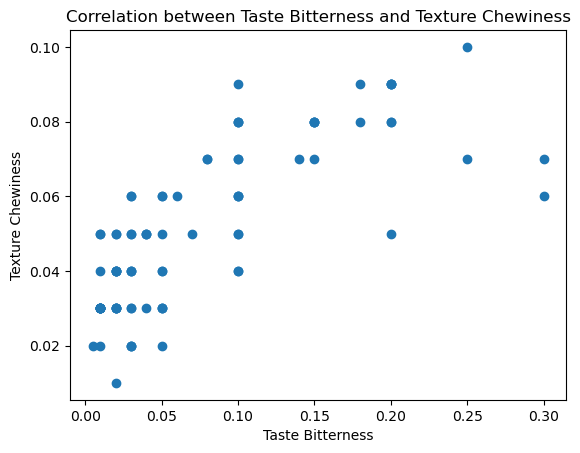

In [124]:
plt.scatter(cookie_data["Taste Bitterness"], cookie_data["Texture Chewiness"])
plt.xlabel('Taste Bitterness')
plt.ylabel('Texture Chewiness')
plt.title('Correlation between Taste Bitterness and Texture Chewiness')
plt.show()

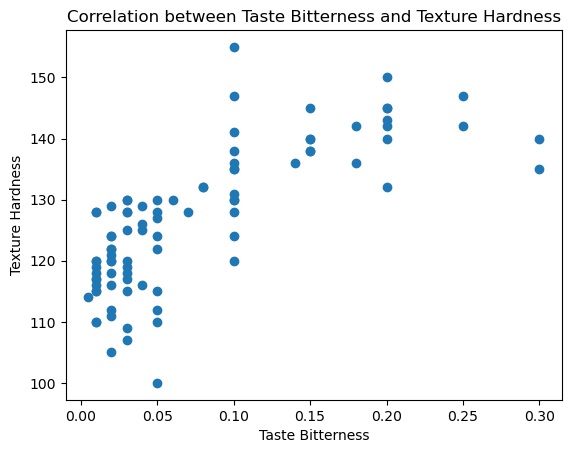

In [125]:
plt.scatter(cookie_data["Taste Bitterness"], cookie_data["Texture Hardness"])
plt.xlabel('Taste Bitterness')
plt.ylabel('Texture Hardness')
plt.title('Correlation between Taste Bitterness and Texture Hardness')
plt.show()

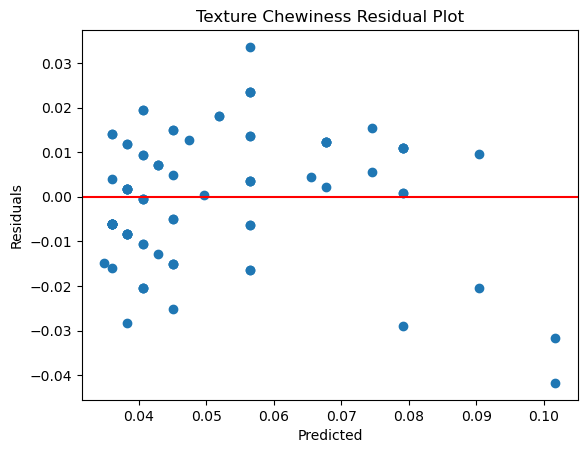

In [127]:
# Check for independence, check Taste Bitterness and Texture Chewiness are independent
X = cookie_data['Taste Bitterness'].values.reshape(-1, 1)
y = cookie_data['Texture Chewiness']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Texture Chewiness Residual Plot")
plt.show()


In [128]:
dw = durbin_watson(residuals)
print("durbin_watson: ", dw)
if dw >= 1.5 and dw <= 2.5:
    print("The independence is met.")
else:
    print("The independence is not met.")


durbin_watson:  1.9559805297893678
The independence is met.


In [126]:
import statsmodels.api as sm

X = cookie_data[['Taste Bitterness', 'Texture Hardness']]
y = cookie_data['Texture Chewiness']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Texture Chewiness   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     334.3
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           5.25e-41
Time:                        15:13:02   Log-Likelihood:                 308.27
No. Observations:                  88   AIC:                            -610.5
Df Residuals:                      85   BIC:                            -603.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1522      0.012  

Based on the scatterplots' pattern, I propose a multi-linear regression model for fitting data. The model accuracy indicated by R^2 is 0.887 with adjusted R^2 being 0.885. These indicates that the model is a good fit, although the previous model (hardness and sweetness) has a better fit and a higher R^2. 
Assumptions are all met for the linear regression, including response variable's normality and homosedasticity, and the independence between explanatory and response variables. 

## Bonus (20pts)

Lasso Regression is a modification of Regression that adds a regularization penalty to the the parameter $\mathbf{\beta}$ learned by the model. The loss function for Lasso is the following:

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2 + \lambda \Vert \mathbf{\beta} \Vert = \beta^T X^T X \beta - 2\mathbf{\beta}^TX^T\mathbf{y}  + \mathbf{y}^T\mathbf{y} + \lambda \Vert \mathbf{\beta} \Vert$$

Where $\lambda$ is a tuning parameter specified by the user.

Using worksheet 17 as a guide:

1. create an animation like in part c) for Lasso Regression. [15pts]
2. create at least two more animations using different values for $\lambda$ and the true $\mathbf{\beta}$ you used to generate the dataset (try steeper / less steep curves, and higher or close to zero intercepts). Briefly explain some key takeaways on how to tune $\lambda$. [5pts]